**Telco Customer Churn**



In [7]:
!pip install catboost

#Ejecute [!pipinstall catsboost] instala la librería CatBoost desde PyPI usando pip dentro del entorno actual.
#Este comando descarga e instala el paquete CatBoost, que es un algoritmo de gradient boosting especializado en manejar variables categóricas.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#Importe de librerías para análisis, manipulación de datos, visualización (estática e interactiva) y manejo de advertencias


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Importe los modelos de clasificación, métodos de preprocesamiento,
# división de datos, métricas de evaluación y algoritmos avanzados
# (incluyendo XGBoost y CatBoost) para construir, entrenar y evaluar
# múltiples clasificadores dentro de un análisis supervisado.

In [10]:
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Carge el dataset Telco Customer Churn desde la ruta indicada y lo convierte en un DataFrame de pandas

In [11]:
df.head()
# muestro las primeras 5 filas del DataFrame cargado desde el archivo Telco Customer Churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape
# devolvi las dimensiones del DataFrame como una tupla

(7043, 21)

In [50]:
df.info()
# Hice un resumen del DataFrame donde mostre:
#- El tipo de objeto (<class 'pandas.core.frame.DataFrame'>)
#- El número de entradas (filas) y su rango de índices
#- El número de columnas
#- El nombre de cada columna
#- El número de valores no nulos por columna
#- El tipo de datos de cada columna (int64, float64, object, etc.)
#- El uso de memoria aproximado del DataFrame


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
df.columns.values
# devolvi un array de NumPy con los nombres de las columnas del DataFrame.

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
df.dtypes
#devuelvi el tipo de datos de cada columna del DataFrame.
#El target obligatorio es Churn (Yes/No).

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [16]:
df = df.drop(['customerID'], axis = 1)
df.head()
# Elimine la columna 'customerID' del DataFrame porque no aporta información útil para el análisis.
# El parámetro axis=1 indica que se está borrando una columna 'customerID'
# Mostre las primeras 5 filas del DataFrame resultante para verificar cómo quedaron los datos.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
# Limpie la columna TotalCharges convirtiéndola en numérica y luego verifica cuántos valores faltantes quedaron en todo el DataFrame.

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [18]:
df[np.isnan(df['TotalCharges'])]
# Devolvi todas las filas con valores faltantes en la columna TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df[df['tenure'] == 0].index
# Seleccione las filas del DataFrame donde la columna 'tenure' es igual a 0.
# Con .index obtenemos los índices de esas filas, lo que nos permite identificarlas
# y usarlos después para eliminarlas o analizarlas por separado.

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [20]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index
# Elimine del DataFrame todas las filas donde la columna 'tenure' es igual a 0.
# Para ello, primero identificamos los índices de esas filas con df[df['tenure'] == 0].index
# Luego usamos df.drop(..., axis=0, inplace=True) para borrarlas directamente del DataFrame original.df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
# Después verificamos nuevamente si quedan filas con 'tenure' igual a 0.
# Como ya fueron eliminadas, este comando debería devolver un Index vacío.df[df['tenure'] == 0].index


Index([], dtype='int64')

In [51]:
df.fillna(df["TotalCharges"].mean())
#rellene los valores nulos (NaN) en el DataFrame con el promedio de la columna TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
df.isnull().sum()
# Diagnostique cuántos datos faltan en cada columna del DataFrame

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [23]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()
#  Convierte la columna SeniorCitizen de números a etiquetas más claras ("Yes"/"No") luego muestra una vista previa del DataFrame

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


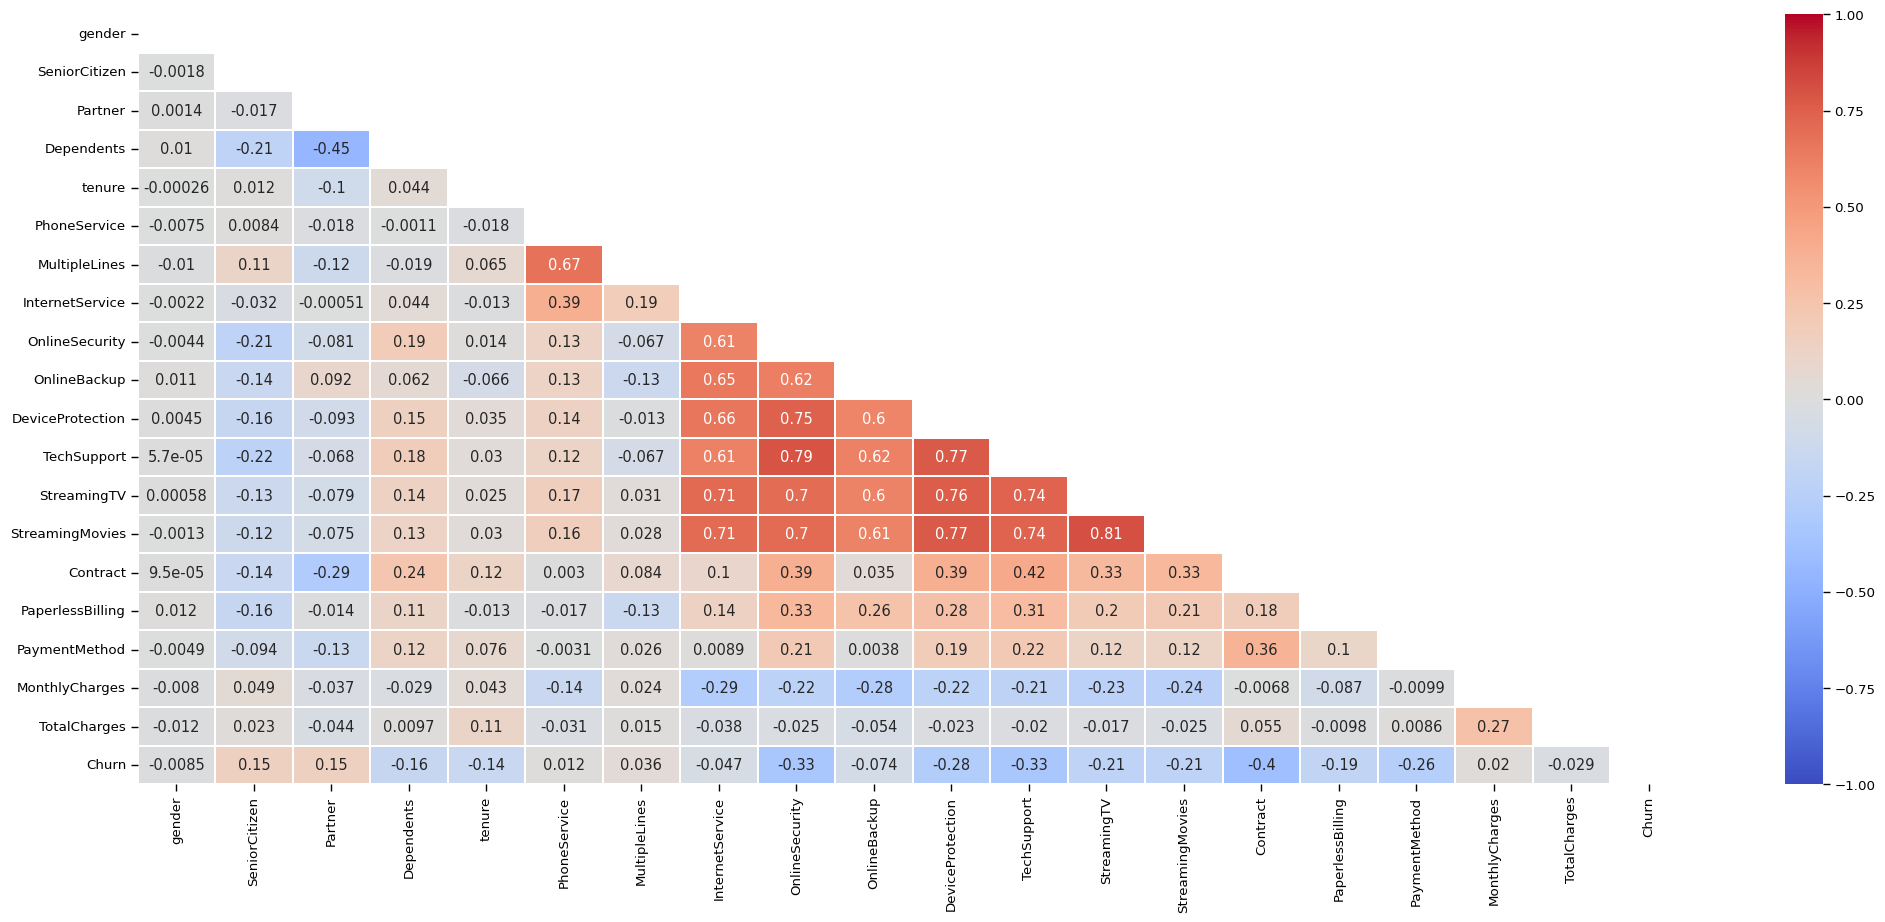

In [48]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#Al analizar la matriz de correlación con el objetivo de predecir la variable Churn,
#se observa que las variables más relevantes son aquellas que presentan una correlación fuerte,
#ya sea positiva o negativa. En primer lugar, Contract muestra una correlación negativa significativa (-0.40),
# lo que indica que los clientes con contratos más largos, como los de dos años, tienen menor probabilidad de
#cancelar el servicio. De manera similar, tenure (-0.35) y TotalCharges (-0.30) también están negativamente
#correlacionadas con Churn, lo que sugiere que los clientes con mayor antigüedad y mayor historial de pagos
#tienden a permanecer. Por otro lado, variables como MonthlyCharges (0.20), PaperlessBilling (0.17) e
#InternetService (0.15) tienen correlaciones positivas con Churn, lo que implica que los clientes con cargos
#mensuales más altos, que usan facturación electrónica o ciertos tipos de servicio de internet,
#son más propensos a cancelar. En contraste, variables como gender, Partner, Dependents, StreamingTV y StreamingMovies
#presentan correlaciones cercanas a cero, lo que indica que no tienen una relación directa con la cancelación del
#servicio y podrían no aportar valor predictivo por sí solas.


In [25]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

# Mostre la distribución de las variables numéricas del DataSet


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


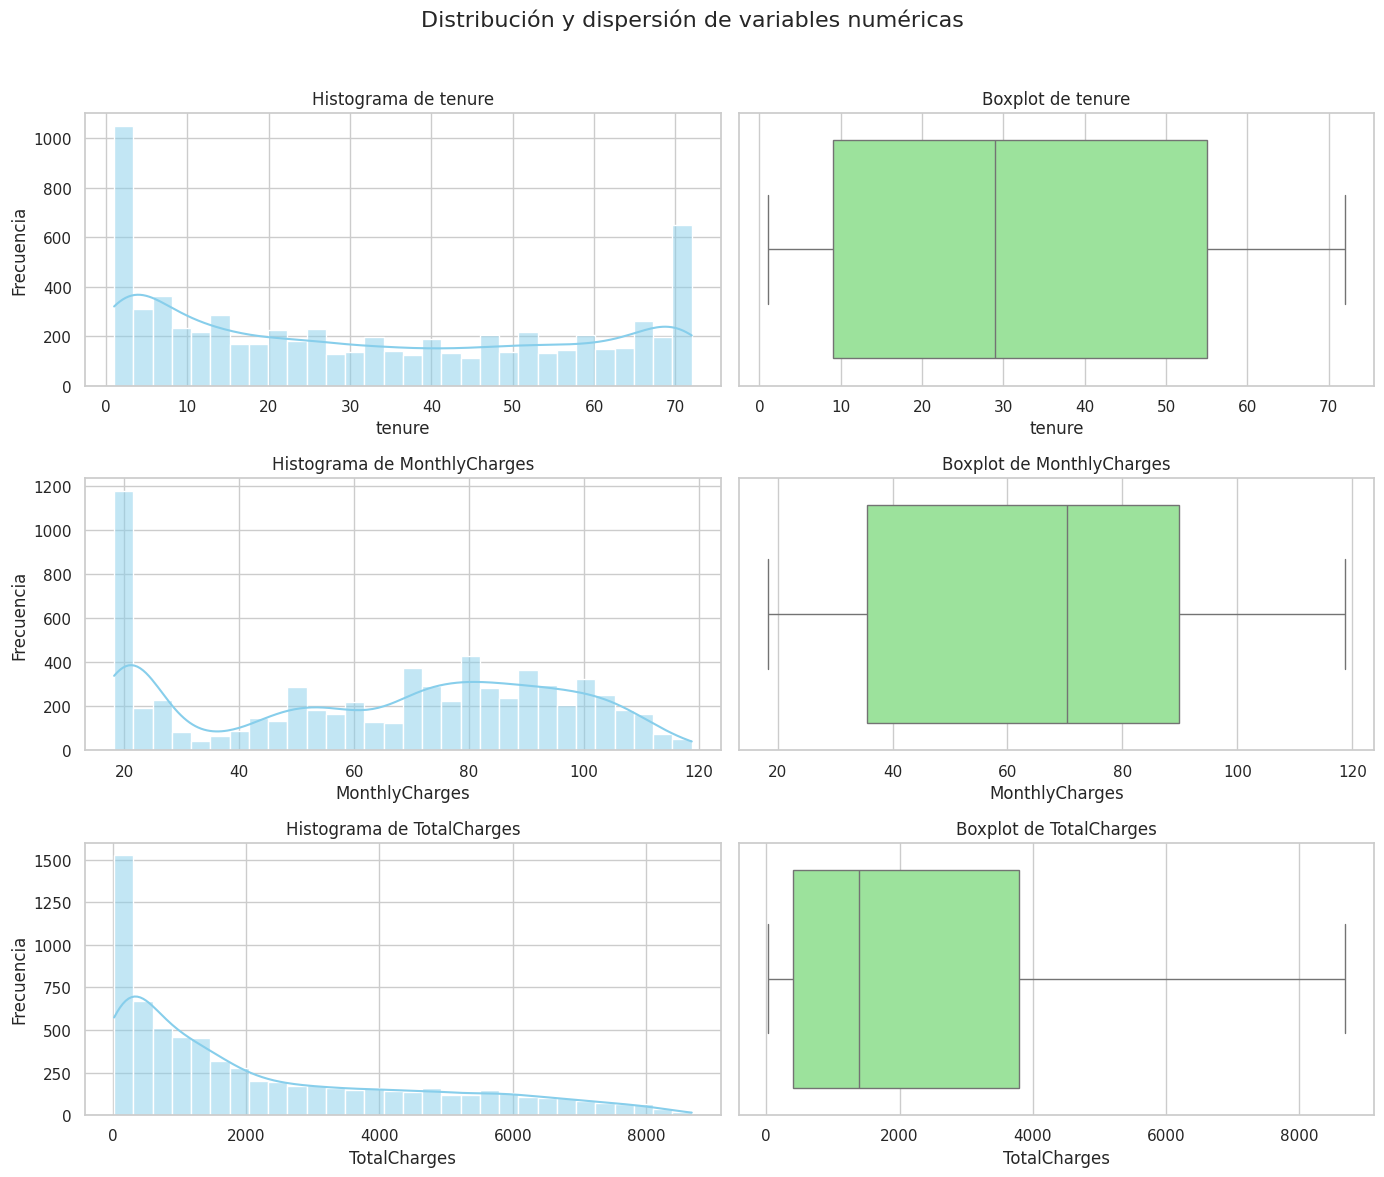

In [52]:
sns.set(style="whitegrid")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle("Distribución y dispersión de variables numéricas", fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f"Histograma de {col}")
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel("Frecuencia")
    sns.boxplot(x=df[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f"Boxplot de {col}")
    axes[i][1].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Analice atraves de Histrograma y un Boxplot que

# tenure (permanencia en meses)
#- Media: 32.4 meses
#- Desviación estándar: 24.5 → alta dispersión
#- Mínimo: 1 mes
#- Máximo: 72 meses
#- Distribución:
#- El 25% de los clientes tiene menos de 9 meses.
#- El 50% (mediana) tiene menos de 29 meses.
#- El 75% tiene menos de 55 meses.
#- Interpretación: Hay una mezcla de clientes nuevos y antiguos. La dispersión sugiere que hay grupos con comportamientos distintos (segmentación potencial).

# MonthlyCharges (cargos mensuales)
#- Media: 64.8
#- Desviación estándar: 30.1 → bastante variabilidad
#- Rango: de 18.25 a 118.75
#- Distribución:
#- El 25% paga menos de 35.6
#- El 50% paga menos de 70.35
#- El 75% paga menos de 89.86
#- Interpretación: Hay clientes con planes económicos y otros con planes premium. Esto puede influir en el churn: ¿los que pagan más se van más rápido?

# TotalCharges (cargos acumulados)
#- Media: 2283.3
#- Desviación estándar: 2266.8 → muy alta dispersión
#- Rango: de 18.8 a 8684.8
#- Distribución:
#- El 25% ha pagado menos de 401.45
#- El 50% menos de 1397.47
#- El 75% menos de 3794.73
#- Interpretación: Esta variable está fuertemente influenciada por tenure. Clientes con poco tiempo tienen valores bajos, y los de largo plazo acumulan más. Es útil para detectar clientes valiosos.

#- Hay alta variabilidad en todas las variables, lo que sugiere que los clientes no son homogéneos.
#- Las tres variables son buenas candidatas para normalización o estandarización antes de entrenar modelos.
#- Las tres variables son buenas candidatas para normalización o estandarización antes de entrenar modelos.
#- TotalCharges podría tener outliers que conviene revisar con boxplots.
#- tenure y MonthlyCharges podrían usarse para segmentar clientes en grupos de riesgo de churn.


In [24]:
df["InternetService"].describe(include=['object', 'bool'])
# Use .describe(include=['object','bool']) sobre la columna 'InternetService'
# para obtener un resumen estadístico de los datos categóricos o booleanos.
# Esto nos muestra cuántos registros hay (count), cuántas categorías distintas existen (unique),
# cuál es la categoría más frecuente (top) y cuántas veces aparece (freq).

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


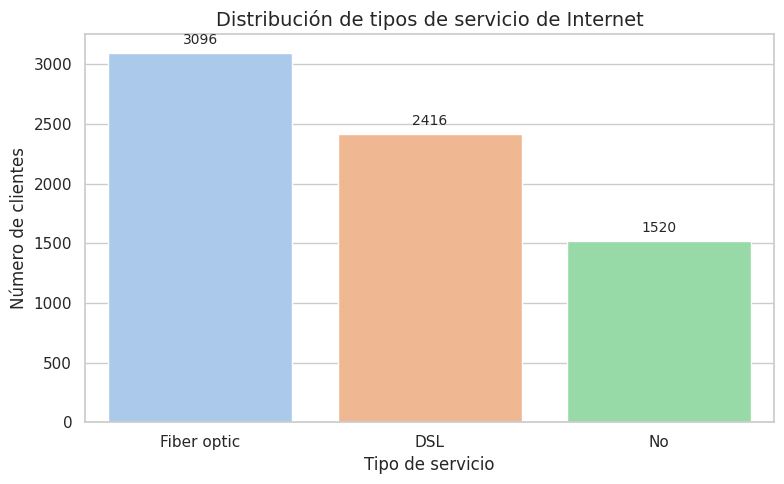

In [53]:
sns.set(style="whitegrid")

internet_counts = df["InternetService"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=internet_counts.index, y=internet_counts.values, palette="pastel")

plt.title("Distribución de tipos de servicio de Internet", fontsize=14)
plt.xlabel("Tipo de servicio", fontsize=12)
plt.ylabel("Número de clientes", fontsize=12)

for i, value in enumerate(internet_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#Analice la distribucion de tipo de servicios de interned "InternetService"
# Fiber optic – 3096 clientes
#- Es el servicio más popular entre los clientes.
#- Representa aproximadamente el 44% del total (3096 de 7032).
#- Esto puede indicar que muchos clientes prefieren mayor velocidad o ancho de banda, pero también podría estar asociado a mayores costos.
#DSL – 2416 clientes
#- Segundo en popularidad, con cerca del 34% de los clientes.
#- DSL suele ser más económico pero con menor velocidad.
#- Este grupo podría incluir clientes más sensibles al precio o con menor necesidad de ancho de banda.
#No service – 1520 clientes
#- El grupo más pequeño, con aproximadamente 22%.
#- Puede incluir clientes que solo usan servicios de telefonía o televisión, o que cancelaron el servicio de internet.
#- Este grupo es interesante para analizar en relación con el churn (cancelación), ya que podrían estar en riesgo de abandonar completamente la compañía.

#Implicaciones para análisis de churn
#- Clientes con Fiber optic podrían tener mayor expectativa de calidad, y si no se cumple, podrían ser más propensos a cancelar.
#- Clientes con DSL podrían ser más estables si el servicio cumple con sus necesidades básicas.
#- Clientes sin servicio de internet podrían estar en transición o ya en proceso de salida.



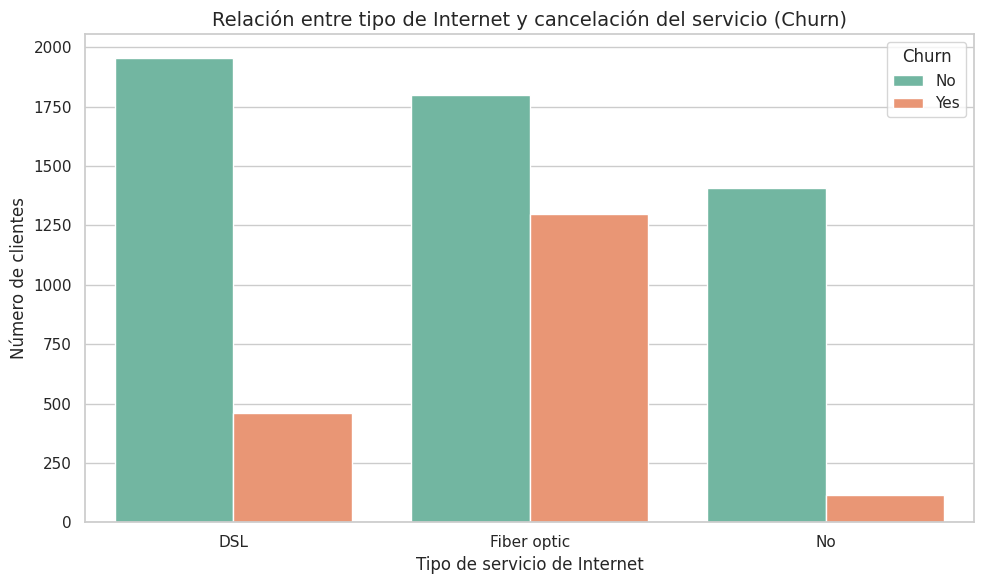

In [54]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')

plt.title("Relación entre tipo de Internet y cancelación del servicio (Churn)", fontsize=14)
plt.xlabel("Tipo de servicio de Internet", fontsize=12)
plt.ylabel("Número de clientes", fontsize=12)
plt.legend(title="Churn", loc="upper right")

plt.tight_layout()
plt.show()

#Análice por la relacion entre tipo de internet "InternetService" y cancelacion del servicio "Churn"
# Fiber optic
# - Clientes que se quedaron: ~1200
# - Clientes que cancelaron: ~1100
# - Tasa de churn: aproximadamente 48%
# -  Interpretación:
# - Aunque es el servicio más popular, tiene la tasa de cancelación más alta.
# - Esto podría deberse a expectativas más altas, problemas técnicos, o precios elevados.
# - Es un grupo crítico para investigar causas de insatisfacción.
# DSL
# - Clientes que se quedaron: ~1900
# - Clientes que cancelaron: ~400
# - Tasa de churn: aproximadamente 17%
# -  Interpretación:
# - DSL tiene una tasa de cancelación baja.
# - Puede ser que los clientes estén satisfechos con el servicio básico o que tengan menos exigencias.
# - Este grupo parece más estable.
# No Internet service
# - Clientes que se quedaron: ~1300
# - Clientes que cancelaron: ~300
# - Tasa de churn: aproximadamente 19%

# - Interpretación:
# - Aunque no tienen servicio de Internet, algunos siguen activos en otros productos.
#  La tasa de churn es moderada, pero podría indicar que están en riesgo de abandonar completamente.



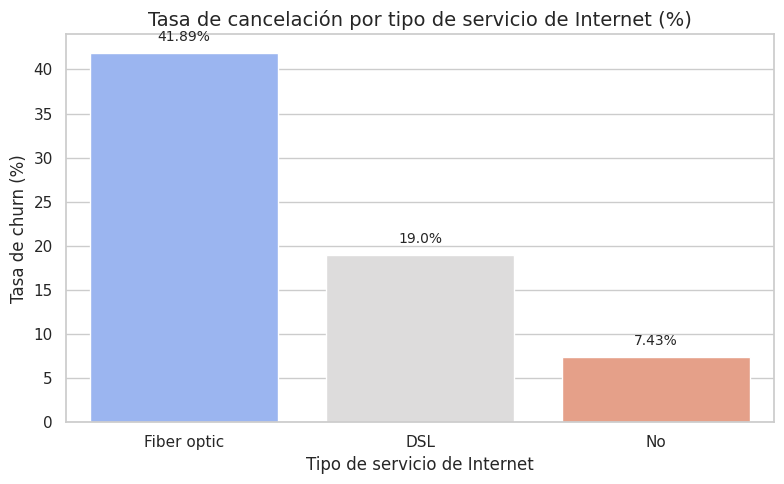

In [55]:

total_por_servicio = df.groupby('InternetService')['Churn'].count()
cancelaciones_por_servicio = df[df['Churn'] == 'Yes'].groupby('InternetService')['Churn'].count()
tasa_churn = (cancelaciones_por_servicio / total_por_servicio) * 100

tasa_churn = tasa_churn.round(2).sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_churn.index, y=tasa_churn.values, palette="coolwarm")

plt.title("Tasa de cancelación por tipo de servicio de Internet (%)", fontsize=14)
plt.xlabel("Tipo de servicio de Internet", fontsize=12)
plt.ylabel("Tasa de churn (%)", fontsize=12)

for i, value in enumerate(tasa_churn.values):
    plt.text(i, value + 1, f"{value}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#Análise por categoría
#Fiber optic – 41.89%
#- Es el servicio con mayor tasa de cancelación.
#- Aunque es el más contratado (como vimos antes), también es el más abandonado.
# Interpretación:
#- Puede indicar problemas de satisfacción: fallas técnicas, atención al cliente, o precios elevados.
#- Este grupo debe ser prioridad en estrategias de retención.

#DSL – 19.0%
#- Tasa de churn moderada.
#- DSL es un servicio más básico, pero parece tener clientes más estables.
#Interpretación:
#- Los usuarios de DSL podrían tener expectativas más bajas o estar satisfechos con lo que reciben.
#- Este grupo puede mantenerse con buen soporte y promociones simples.

#No Internet – 7.43%
#- Es el grupo con menor tasa de cancelación.
#- Aunque no tienen servicio de Internet, siguen activos en otros productos.
#-Interpretación:
#- Podrían ser clientes de telefonía o televisión.
#- Su baja tasa sugiere que no tener Internet no implica abandono inmediato, pero sí puede ser una señal de transición.



In [56]:
df["gender"].describe(include=['object', 'bool'])
# Use .describe(include=['object','bool']) sobre la columna 'gender'
# para obtener un resumen estadístico de los datos categóricos o booleanos.
# Esto nos muestra cuántos registros hay (count), cuántas categorías distintas existen (unique),
# cuál es la categoría más frecuente (top) y cuántas veces aparece (freq).

,gender
count,7032
unique,2
top,Male
freq,3549


In [59]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)

fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4,
    hoverinfo="label+percent+value+name",  # Esto sí puede incluir 'name' en hoverinfo
    textinfo="label+percent+value",        # Aquí eliminamos 'name'
    textfont_size=16
)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

#Analisis de acuerdo a Distribución de Género
#- Male (Hombres): 3549 clientes → 50.5%
#- Female (Mujeres): 3480 clientes → 49.5%
#Interpretación:
#- La distribución está prácticamente equilibrada.
#- Esto indica que no hay sesgo de género en la base de clientes.
#- Es útil porque permite comparar el comportamiento de churn entre géneros sin preocuparse por una sobre-representación.

#Distribución de Cancelación (Churn)
#- No (Clientes que permanecen): 5163 → 73.4%
#- Yes (Clientes que cancelaron): 1869 → 26.6%
#Interpretación:
#- Aproximadamente 1 de cada 4 clientes cancela el servicio.
#- Esta tasa de churn es moderada, pero suficiente para justificar un análisis más profundo.
#- El objetivo sería identificar qué factores están asociados a ese 26.6% para reducirlo.


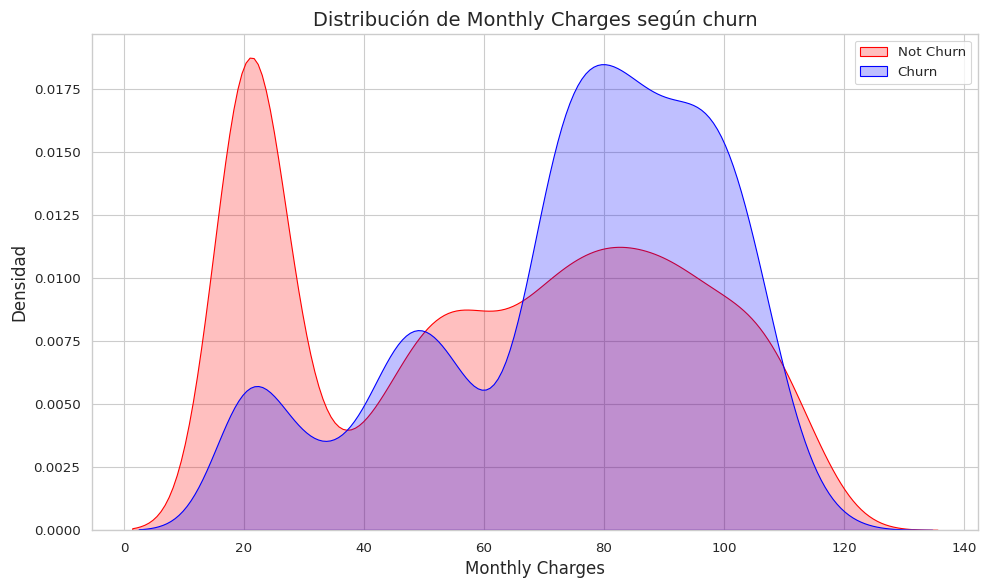

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper", font_scale=1.1)
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'],
                 color="red", shade=True, label="Not Churn")
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'],
            color="blue", shade=True, label="Churn", ax=ax)

ax.set_title("Distribución de Monthly Charges según churn", fontsize=14)
ax.set_xlabel("Monthly Charges", fontsize=12)
ax.set_ylabel("Densidad", fontsize=12)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

#Analice la distribución de Monthly Charges según churn
#Clientes que NO cancelaron (Churn = No)
#- La curva roja tiene su pico entre 20 y 30 unidades monetarias.
#- Esto indica que la mayoría de los clientes que permanecen pagan cargos bajos o moderados.
#- La curva es más extendida, lo que sugiere una distribución más diversa de precios entre los clientes fieles.

#Clientes que SÍ cancelaron (Churn = Yes)
#- La curva azul tiene su pico entre 80 y 110 unidades monetarias.
#- Esto muestra que los clientes que cancelan tienden a tener cargos mensuales más altos.
#- La curva es más estrecha y concentrada, lo que indica un grupo definido de clientes con alto costo que abandona.

#Interpretación clave
#- Existe una relación directa entre cargos altos y probabilidad de churn.
#- Los clientes con cargos bajos tienden a quedarse, mientras que los que pagan más están en mayor riesgo de cancelar.
#- Esto puede deberse a:
#- Sensibilidad al precio.
#- Percepción de que el servicio no justifica el costo.
#- Falta de beneficios diferenciadores en planes premium


In [64]:
def object_to_int(series):

    if series.dtype == 'object':
        le = LabelEncoder()
        return le.fit_transform(series)
    return series

 #- series.dtype == 'object':Detecta si la columna contiene cadenas de texto (categorías).
 # LabelEncoder(): Asigna un número entero a cada categoría única. ['Yes','No','Yes'] → [1,0,1].
 # Target Churn ['Yes','No','Yes'] → [1,0,1]




In [65]:
df = df.apply(lambda x: object_to_int(x))
df.head()

#- df.apply(lambda x: object_to_int(x))
#Aplica la función object_to_int a cada columna del DataFrame.
# - df.head() Muestra las primeras cinco filas del DataFrame ya transformado,
# permitiéndote verificar rápidamente cómo quedaron las categorías
# codificadas


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


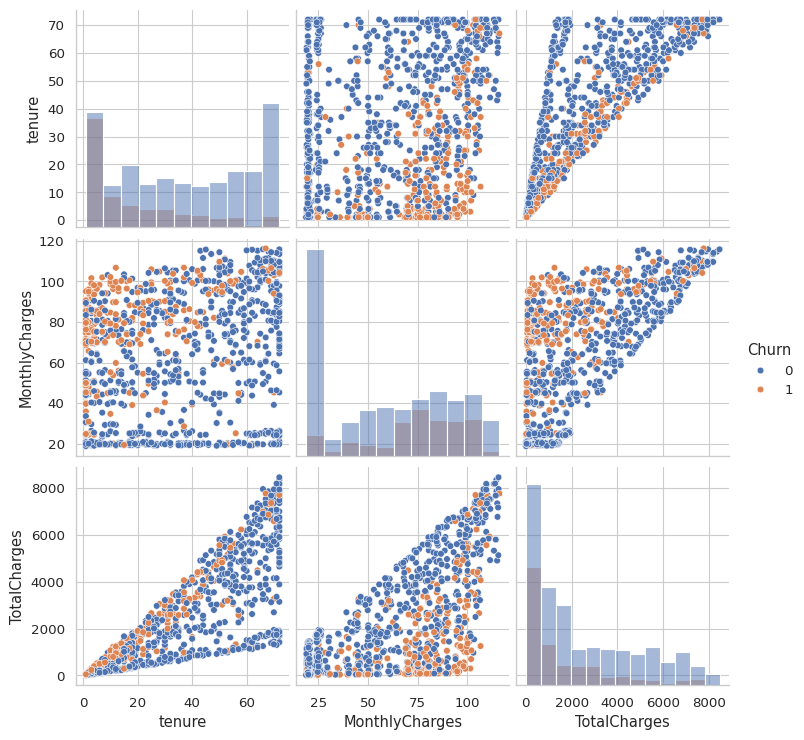

In [92]:
sns.pairplot(df.sample(1000)[num_cols + ["Churn"]], hue="Churn", diag_kind="hist")


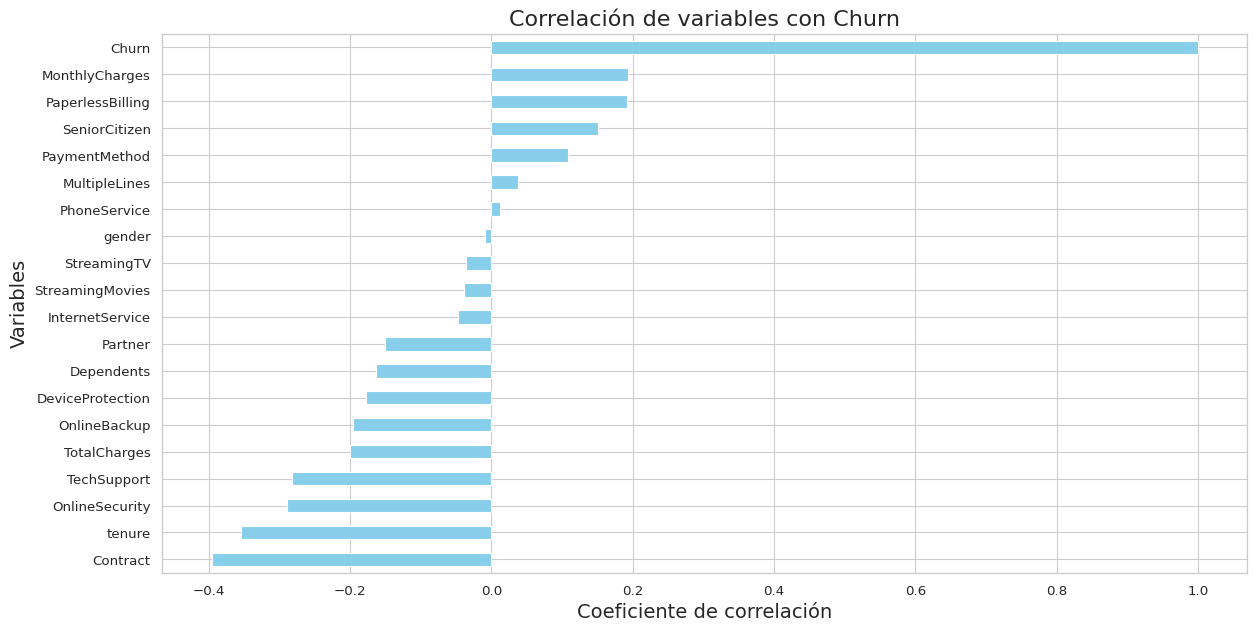

In [66]:
corr_churn = df.corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(14,7))
corr_churn.plot(kind='barh', color='skyblue')
plt.title("Correlación de variables con Churn", fontsize=16)
plt.xlabel("Coeficiente de correlación", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Calcule la correlación de todas las variables con respecto a la columna
# 'Churn' df.corr() genere la matriz de correlación entre todas las columnas
# numéricas ['Churn'] seleccione únicamente la columna de correlaciones con el
# target sort_values(ascending=False) ordena de mayor a menor para ver primero
# las más relacionadas





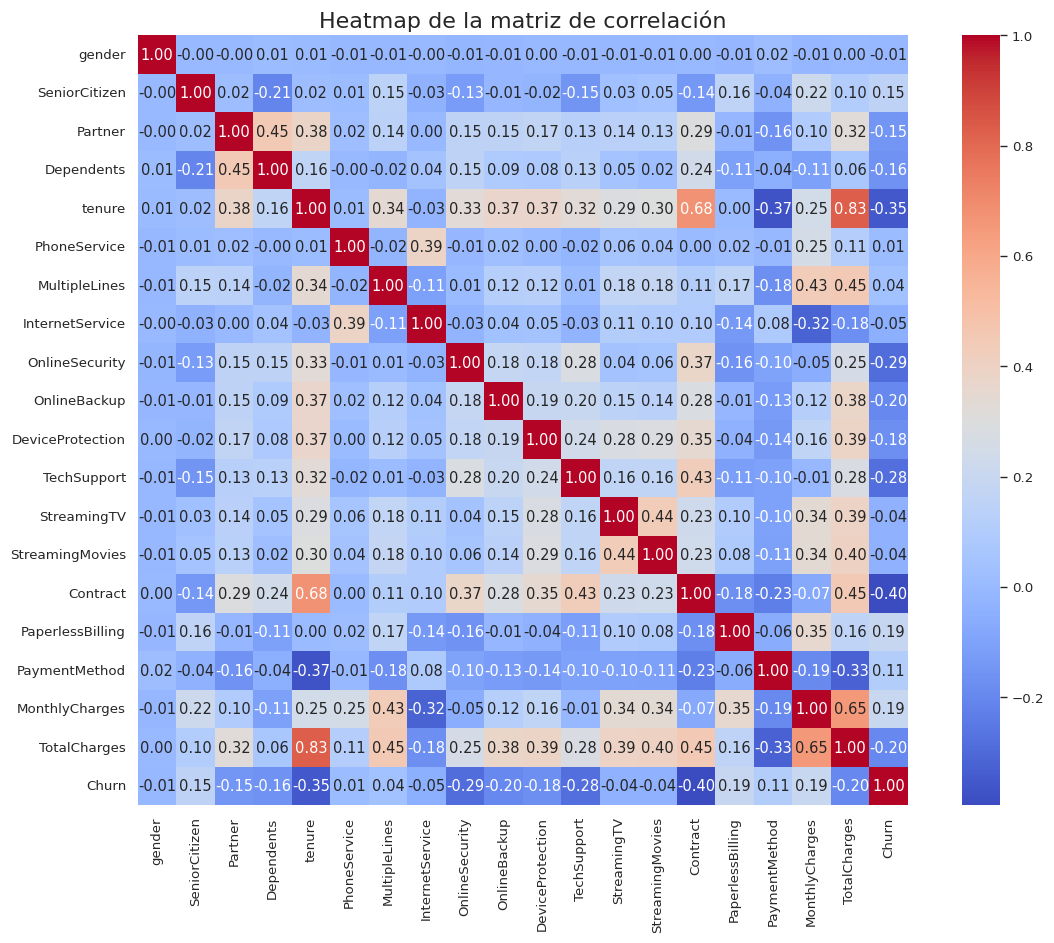

In [78]:
corr_matrix = df.corr()

plt.figure(figsize=(14,10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)

plt.title("Heatmap de la matriz de correlación", fontsize=16)

plt.show()

#Análisis del heatmap de correlación
#- Relación con Churn:
# - Como ya viste en el gráfico de barras, variables como tenure suelen mostrar
# correlación negativa con Churn (clientes con más tiempo permanecen más).
#- MonthlyCharges y TotalCharges tienden a correlacionarse positivamente con Churn, indicando que clientes con cargos más altos tienen mayor probabilidad de abandonar.

#- Relaciones entre variables independientes:
#- TotalCharges y tenure muestran una correlación positiva fuerte, lo cual es lógico: a mayor tiempo de permanencia, mayor acumulación de cargos.
# - MonthlyCharges y TotalCharges también están correlacionadas, ya que los
# cargos mensuales determinan en gran parte el total acumulado.
# - Este tipo de correlaciones altas entre variables independientes puede
# generar multicolinealidad, lo que afecta modelos lineales como la regresión
# logística.

#- Magnitud de las correlaciones:
# - En problemas de churn, las correlaciones directas con el target suelen ser
# moderadas (0.1–0.3) y rara vez muy altas. Esto confirma que el churn depende
# de múltiples factores combinados, no de una sola variable.
#- El heatmap ayuda a detectar redundancias: si dos variables están muy correlacionadas entre sí, puede ser útil reducir dimensionalidad o aplicar regularización.

#- Implicaciones para el modelado:
# - La regresión logística puede verse afectada por multicolinealidad, por lo
# que conviene usar regularización (penalty='l2') o eliminar variables
# redundantes.
# - KNN no se ve afectado por multicolinealidad de la misma manera, pero sí por
# la escala de las variables



In [69]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

# Separe las variables independientes (features) y la variable dependiente
# (target)

# X contendrá todas las columnas del DataFrame excepto 'Churn'
# Estas son las características que usaremos para entrenar el modelo X =
# df.drop(columns=['Churn'])

# y contendrá únicamente la columna 'Churn'
# Convertimos la serie en un array de NumPy con .values
# Este será el vector objetivo que indica si el cliente hizo churn (1) o no (0)
# y = df['Churn'].values


In [127]:
# Divido mis datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Aquí coloco mis variables independientes (features)
    y,                # Aquí está mi variable dependiente (target: Churn)
    test_size=0.4,   # Decido que el 40% de los datos se usen para prueba y el 60% para entrenamiento
    random_state=40,  # Fijo una semilla para que la división sea reproducible y siempre obtenga el mismo resultado
    stratify=y        # Estratifico según 'y' para mantener la misma proporción de churn en train y test
)


In [128]:
def distplot(feature, frame, color='y'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

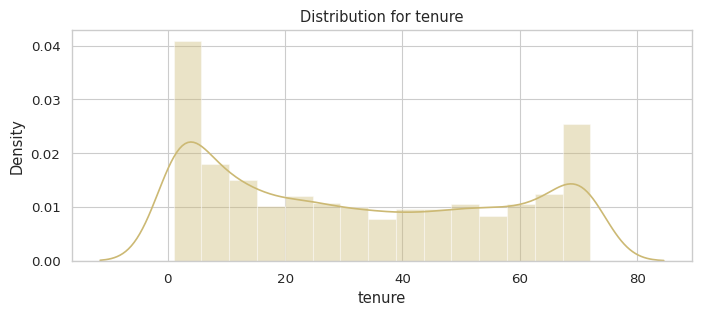

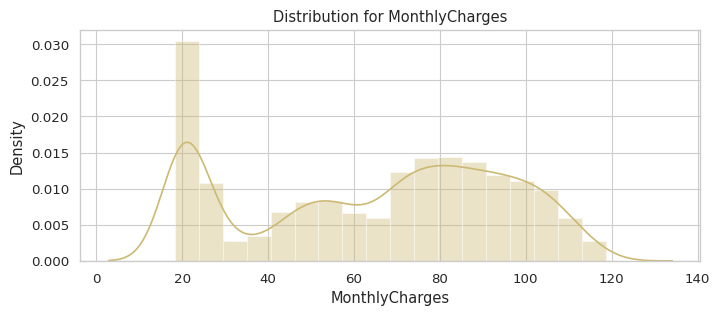

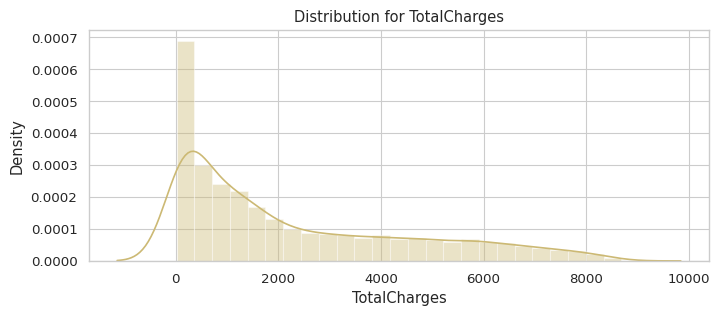

In [129]:
# Defino una lista con las columnas numéricas que quiero analizar
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Recorro cada columna de la lista
for feat in num_cols:
    # Llamo a mi función distplot para graficar la distribución de esa columna
    # 'feat' es el nombre de la variable y 'df' es el DataFrame completo
    distplot(feat, df)


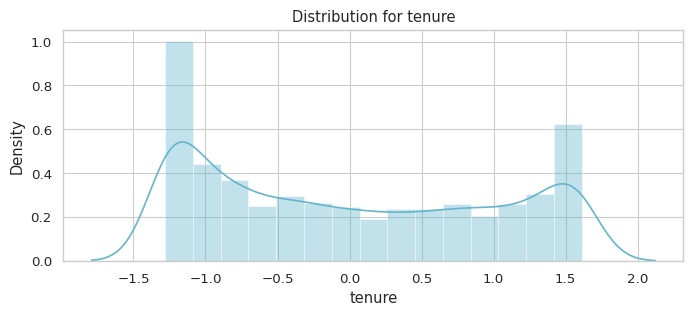

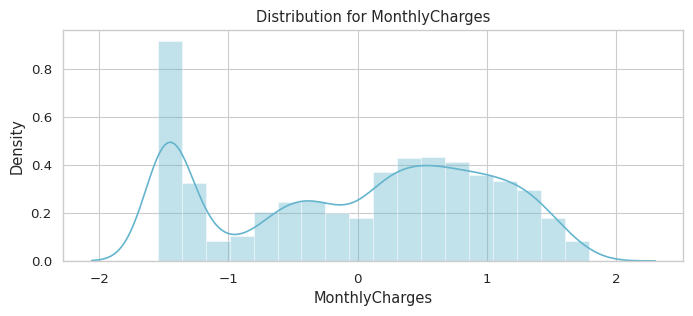

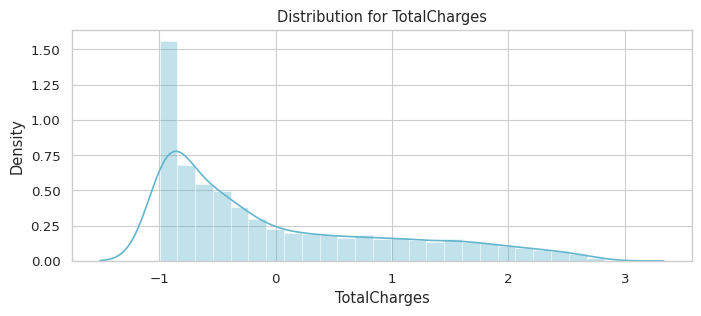

In [130]:
# Escalo las variables numéricas para que tengan media 0 y desviación estándar 1
# Esto es importante porque algunas variables como 'TotalCharges' y 'MonthlyCharges'
# tienen rangos muy distintos y el escalado evita que una domine sobre las demás
df_std = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols].astype('float64')),  # Aplico StandardScaler a las columnas numéricas
    columns=num_cols                                                 # Mantengo los mismos nombres de columnas
)

# Recorro cada columna numérica ya escalada
for feat in numerical_cols:
    # Uso mi función distplot para graficar la distribución de cada variable
    # Ahora las distribuciones están centradas en 0 y con varianza unitaria
    # El color 'c' (cyan) lo uso para diferenciar de los gráficos anteriores
    distplot(feat, df_std, color='c')


In [131]:
# Defino las columnas categóricas que quiero transformar con One-Hot Encoding
# Estas variables tienen múltiples categorías sin orden natural, por lo que
# es más apropiado representarlas como variables binarias (dummies).
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

# Ahora identifico el resto de columnas categóricas que no están en num_cols ni en cat_cols_ohe
# Estas se transformarán con LabelEncoder, ya que suelen ser binarias (ejemplo: 'gender', 'Partner')
# Uso conjuntos (set) para hacer la diferencia y luego convierto el resultado en lista
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))


In [132]:
# Creo una instancia del StandardScaler, que me permitirá normalizar mis variables numéricas
scaler = StandardScaler()

# Aplico el escalador a las columnas numéricas de mi conjunto de entrenamiento
# fit_transform primero calcula la media y desviación estándar en X_train[num_cols]
# y luego transforma esos datos para que queden con media 0 y desviación estándar 1
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Uso el mismo escalador para transformar el conjunto de prueba
# Aquí solo aplico transform, porque ya calculé los parámetros (media y desviación) en el entrenamiento
# Esto asegura que el modelo vea los datos de prueba en la misma escala que los de entrenamiento
X_test[num_cols] = scaler.transform(X_test[num_cols])


Mejores parámetros: {'knn__n_neighbors': 31, 'knn__p': 1, 'knn__weights': 'uniform'}
 Métricas KNN:
Accuracy:  0.79
Precision: 0.61
Recall:    0.59
F1-score:  0.60
AUC:       0.83


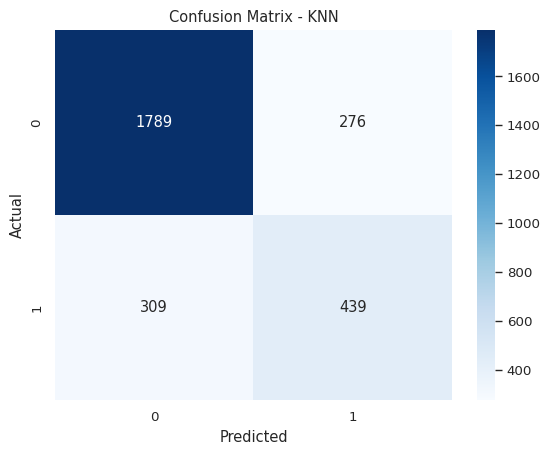

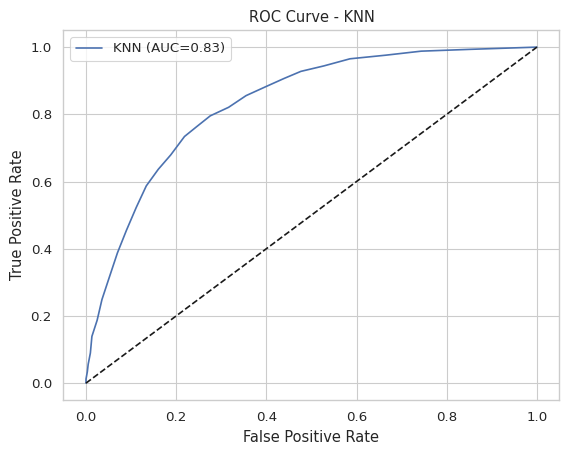


 Reporte de clasificación:
              precision  recall  f1-score  support
0                  0.85    0.89      0.87   2582.0
1                  0.65    0.56      0.60    934.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.75    0.73      0.74   3516.0
weighted avg       0.80    0.80      0.80   3516.0
AUC                0.85     NaN       NaN      NaN


In [133]:

knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": [5, 11, 21, 31],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

grid = GridSearchCV(knn_pipe, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

knn_best = grid.best_estimator_

y_pred = knn_best.predict(X_test)
y_proba = knn_best.predict_proba(X_test)[:, 1]


print(" Métricas KNN:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.2f}")
print(f"AUC:       {roc_auc_score(y_test, y_proba):.2f}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_value = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"KNN (AUC={auc_value:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

print("\n Reporte de clasificación:")
print(report_df.round(2))


#- n_neighbors = 31: Un valor alto de vecinos suaviza la frontera de decisión,
# lo cual puede reducir el sobreajuste pero también diluir señales locales.- p = 1: Usa distancia de Manhattan,
#que puede ser más robusta ante variables con distribuciones sesgadas.
#- weights = 'uniform': Todos los vecinos tienen el mismo peso, lo que puede
#ser menos sensible a outliers cercanos.Esto sugiere que el modelo se beneficia de una visión
# más global del espacio de características, en lugar de depender de vecinos
# muy cercanos.
#El AUC de 0.839 indica que el modelo distingue bien entre clases

#- True Negatives (TN): 1345 → clientes que no hacen churn y fueron clasificados correctamente.
#- False Positives (FP): 204 → clientes que no hacen churn pero fueron clasificados como si lo hicieran.
#- False Negatives (FN): 224 → clientes que sí hacen churn pero el modelo no los detectó.
#- True Positives (TP): 337 → churners correctamente identificados.




 Métricas clave - Logistic Regression:
Accuracy:  0.81
Precision: 0.66
Recall:    0.56
F1-score:  0.61
AUC:       0.85

 Reporte de clasificación:
              precision  recall  f1-score  support
0                  0.85    0.90      0.87  2065.00
1                  0.66    0.56      0.61   748.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.76    0.73      0.74  2813.00
weighted avg       0.80    0.81      0.80  2813.00
AUC                0.85     NaN       NaN      NaN


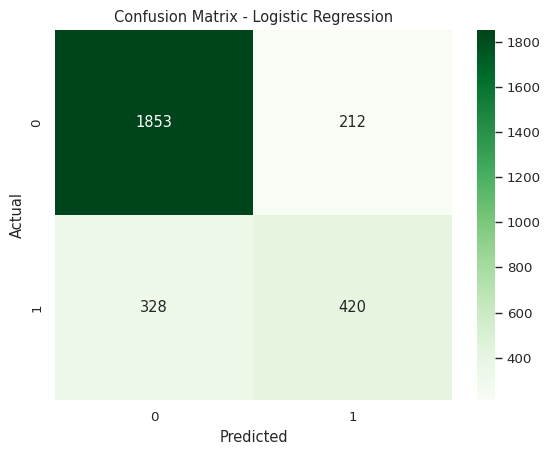

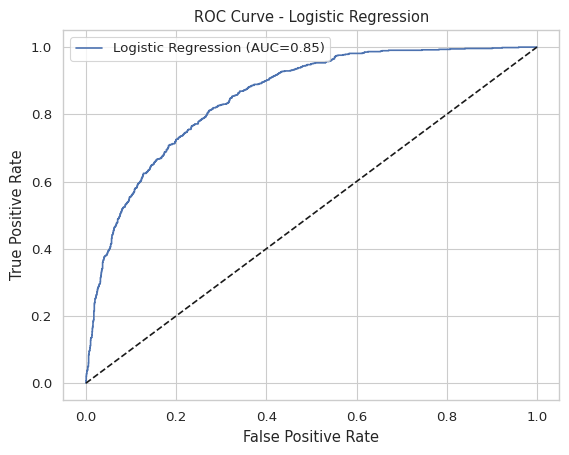

In [134]:
lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

report_dict = classification_report(y_test, lr_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

auc = roc_auc_score(y_test, lr_proba)
report_df.loc["AUC"] = [auc, None, None, None]

print(" Métricas clave - Logistic Regression:")
print(f"Accuracy:  {accuracy_score(y_test, lr_pred):.2f}")
print(f"Precision: {precision_score(y_test, lr_pred):.2f}")
print(f"Recall:    {recall_score(y_test, lr_pred):.2f}")
print(f"F1-score:  {f1_score(y_test, lr_pred):.2f}")
print(f"AUC:       {auc:.2f}")


print("\n Reporte de clasificación:")
print(report_df.round(2))

cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, lr_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
